<a href="https://colab.research.google.com/github/rakhmatovd/Diagnosis_Of_Diabetes_Practise/blob/main/Diagnosis_Of_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Diagnosis of diabetes**


Using the k-NN model

The following dataset is from the National Institute of Diabetes and Kidney Diseases, India. The goal is to predict whether a patient has diabetes based on diagnostic measurements.


Content

*All patients in the dataset are women at least 21 years old.*

Columns:


*   Pregnancies: the number of pregnancies
*   Glucose: Glucose test result
*   BloodPressure: diastolic blood pressure (mm Hg)
*   SkinThickness: Triceps skinfold thickness (mm)
*   Insulin: 2-hour serum insulin (mu U/ml)

*   BMI: Body Mass Index (weight in kg / (height in m) ^ 2)
*   DiabetesPedigreeFunction: Diabetes Pedigree Function
*   Age: Age (years)
*   Outcome: Class (0 - no diabetes, 1 - diabetes)

Dataset: https://github.com/anvarnarz/praktikum_datasets/blob/main/diabetes.csv



In [119]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import jaccard_score
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [120]:
url="/content/diabetes.csv"
df = pd.read_csv(url)
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
56,7,187,68,39,304,37.7,0.254,41,1
541,3,128,72,25,190,32.4,0.549,27,1
602,1,124,74,36,0,27.8,0.100,30,0
701,6,125,78,31,0,27.6,0.565,49,1
738,2,99,60,17,160,36.6,0.453,21,0
302,5,77,82,41,42,35.8,0.156,35,0
643,4,90,0,0,0,28.0,0.610,31,0
92,7,81,78,40,48,46.7,0.261,42,0
508,2,84,50,23,76,30.4,0.968,21,0
178,5,143,78,0,0,45.0,0.190,47,0


In [121]:
df.shape

(768, 9)

In [122]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

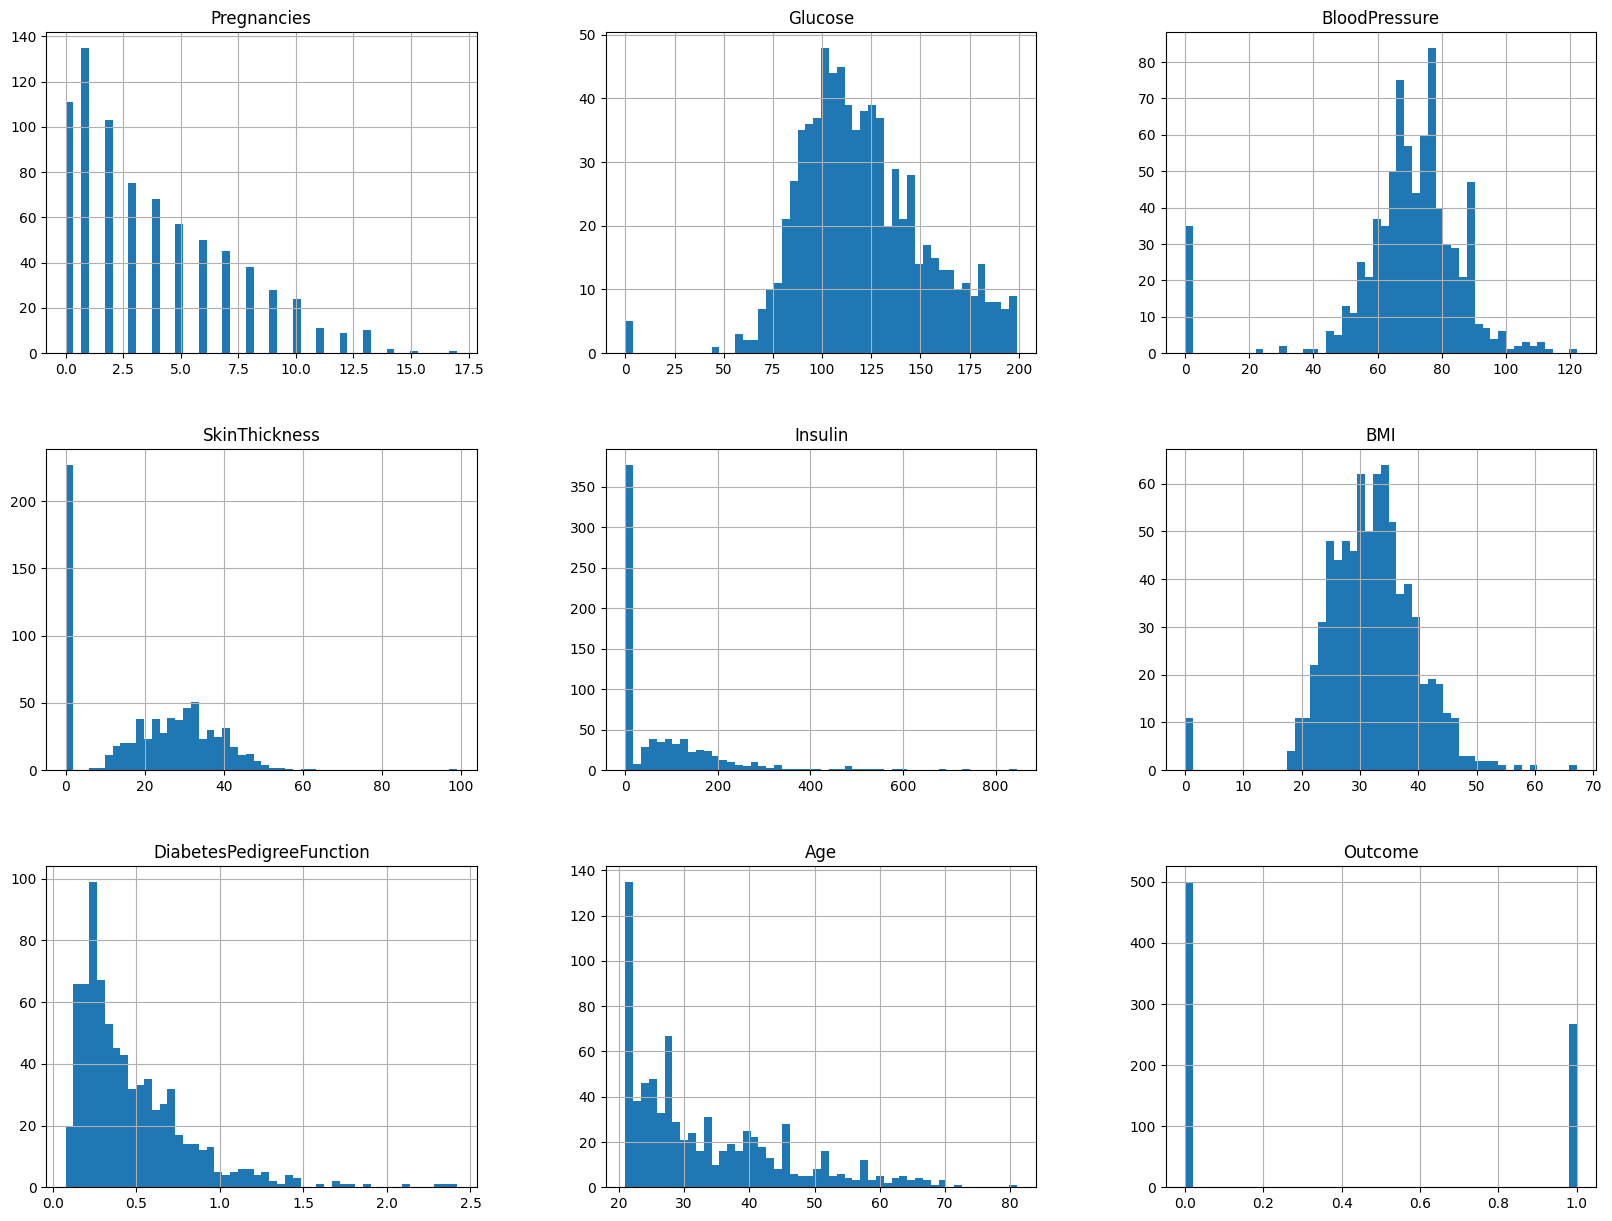

In [123]:
%matplotlib inline
df.hist(bins=50, figsize=(20,15))
plt.show()

In [31]:
corr_matrix = df.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,0.081672,0.073535,0.017683,0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,0.113970,0.074752
Insulin,0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,0.113970,0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [124]:
df.corrwith(df['Outcome']).abs().sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
dtype: float64

In [125]:
X = df.drop('Outcome', axis=1).values
y = df['Outcome']

In [126]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=25)

# Standardize features (optional but recommended)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [127]:
param_grid = {'n_neighbors': np.arange(1, 25)}

knn_gscv = GridSearchCV(knn, param_grid, cv=5)

knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=17),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [128]:
knn_gscv.cv_results_['rank_test_score']

array([24, 23, 15, 18, 22, 21, 17, 16, 20, 19, 14,  9,  4, 11,  3, 12,  1,
        6,  2,  8,  5, 10,  7, 13], dtype=int32)

In [129]:
knn_gscv.best_params_ # OR:

{'n_neighbors': 17}

In [130]:
knn_gscv.best_score_

0.7669892199303965

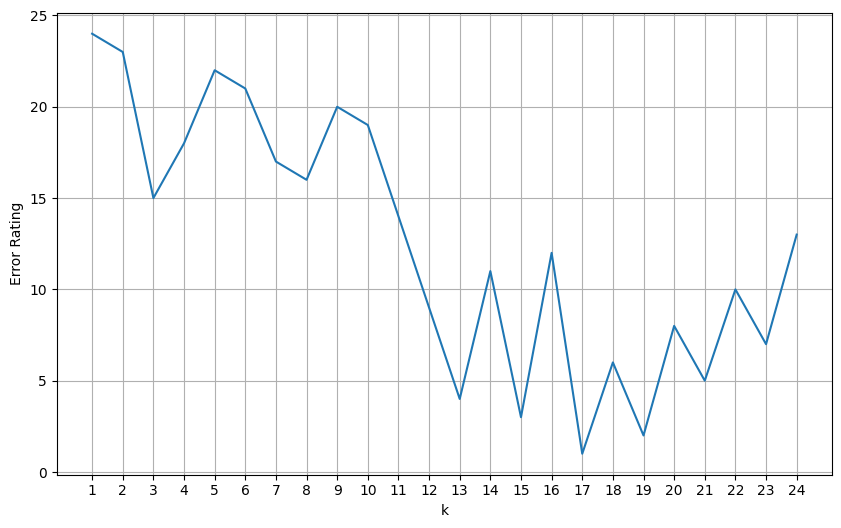

In [131]:
plt.figure(figsize=(10,6))
plt.plot(param_grid['n_neighbors'], knn_gscv.cv_results_['rank_test_score'])
plt.xticks(param_grid['n_neighbors'])
plt.xlabel("k")
plt.ylabel("Error Rating")
plt.grid()
plt.show()

In [132]:
# k-NN
knn = KNeighborsClassifier(n_neighbors=17) # k values

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [133]:
y_predict = knn.predict(X_test)

In [134]:
jaccard_score(y_test, y_predict)

0.41935483870967744

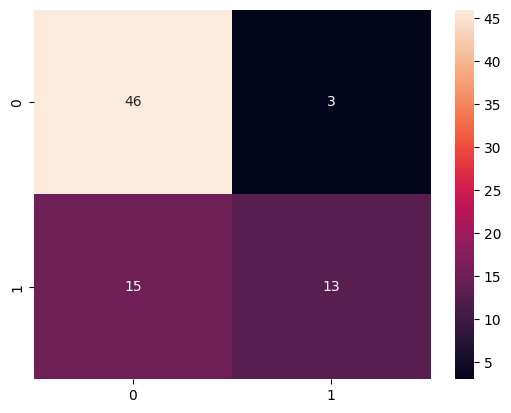

In [135]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

In [136]:
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
print(f"{precision=}\n{recall=}\n{f1=}\n{accuracy=}")

precision=0.8125
recall=0.4642857142857143
f1=0.5909090909090908
accuracy=0.7662337662337663


In [98]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77        50
           1       0.58      0.56      0.57        27

    accuracy                           0.70        77
   macro avg       0.67      0.67      0.67        77
weighted avg       0.70      0.70      0.70        77



In [99]:
# Cross validation
predict = cross_val_predict(estimator = knn, X = X, y = y, cv = 5)

# Model evaluation
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.89      0.83       500
           1       0.72      0.54      0.62       268

    accuracy                           0.77       768
   macro avg       0.75      0.71      0.73       768
weighted avg       0.76      0.77      0.76       768

